# Statistical Distribution II: Uniform, Exponential, and Poisson
Agenda today:
- Introducing three new types of distributions 
- Implement these distributions using numpy and scipy modules
- Work on specific use cases of these distributions

After today, you will be able to:
- Identify different types of distributions and their applications
- Compute the probability of certain events using the appropriate distribution
- Implement the computation in python

## Part I. Uniform Distribution
- A distribution for which all intervals of the same length have the same probability.
- Can be either discrete or continuous

\begin{split}f(X=x) = \left\{ \begin{array}{c} \frac{1}{b-a}, \text{ for } x \in [a, b]\\ 0, \text { otherwise}\end{array} \right.\end{split}

$E[X] = \frac{a+b}{2}$

$Var(X) = \frac{(b-a)^2}{12}$


CDF:
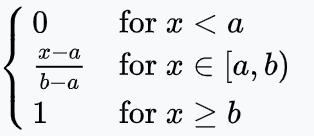

#### Example 1:

Suppose you hear an announcement while waiting for an MTA train that states that a train will arrive within 30 minutes. Assuming an equal chance train arriving throughout that whole time frame.

- What is the expected amount of time until the train arrives?
- What is the probability of the train coming within 25 min?

In [1]:
# 1
expected_value = (30-0)/2
print(expected_value)

15.0


In [2]:
#2
p_train_within_25 = (25-0)/(30-0)
p_train_within_25

0.8333333333333334

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def uniform_density(theta_1, theta_2):
    """Theta1 is the lower bound of possible outcomes.
       Theta2 is the upper bound of all possible outcomes.
       We are assuming that no other values outside of these bounds are possible,
       and that all possabilities within those bounds have equal probability of occuring.
    """
    prob = 1/(theta_2 - theta_1)
    return prob


def plot_uniform(theta_1, theta_2):
    y = np.linspace(start=theta_1, stop=theta_2, num=10**3)
    plt.plot(y, [uniform_density(theta_1, theta_2) for yi in y])
    plt.title('Uniform Probability Density Function')

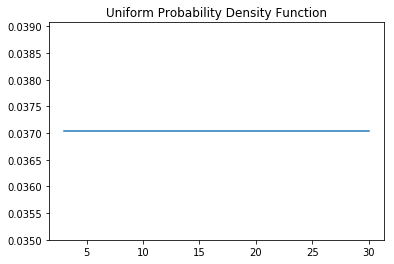

In [38]:
plot_uniform(3,30)


#### Example 2:
The MTA has taken a poll to determine if they should get a station llamas as a way to boost morale of commuters. 60% of commuters are in favor of this proposal, with a 10% +/- margin for error.

- What is the probability that the actual amount of positive responses is 55%?
- What is the probability that the actual amount of positive responses is greater than 60%?
- What is the probability that the actual amount of positive responses is between 54% and 63%?

In [5]:
#1 : 0
#2 : 50%
#3 : (63-54)/(70-50) = 0.45

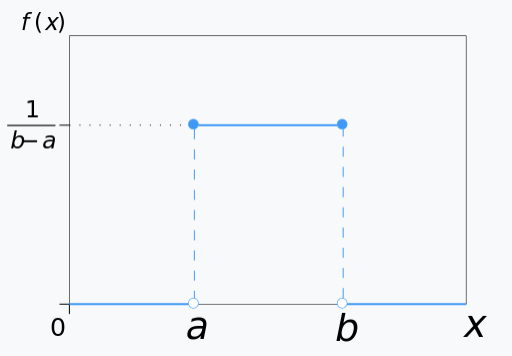

____
## Part II. Exponential Distribution
Exponential distribution is a statistical distribution that's used for modeling the time between an event occurs. 
Example:
- How long does it take until I get a text back?
- How much time will pass until another student enrolls in the data science immersive?

PDF : $Pr(X=x) = \lambda e^{-\lambda x}, \text{ for } x \in (0, \infty)$

$E[X] = \frac{1}{\lambda}$

$Var(X) = \frac{1}{\lambda^2}$

CDF : $1 −  e^{−\lambda x}$

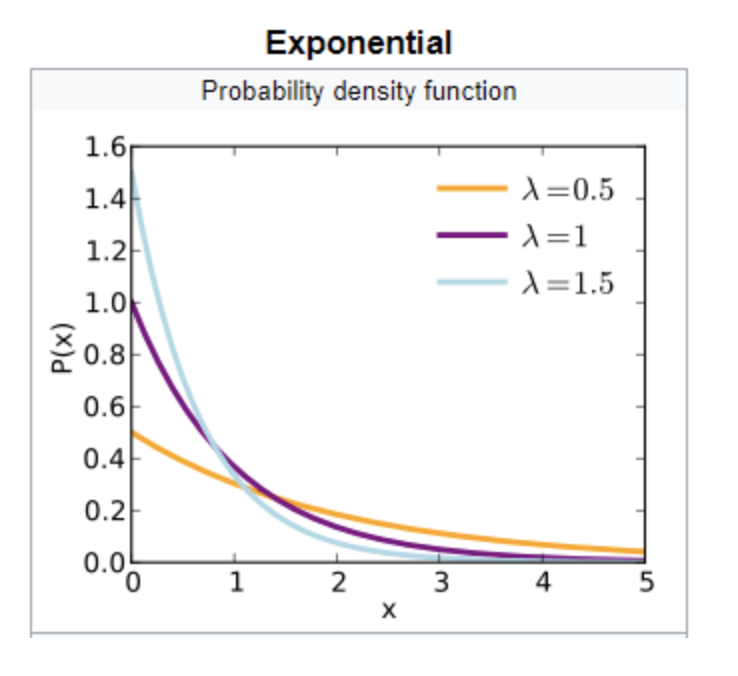
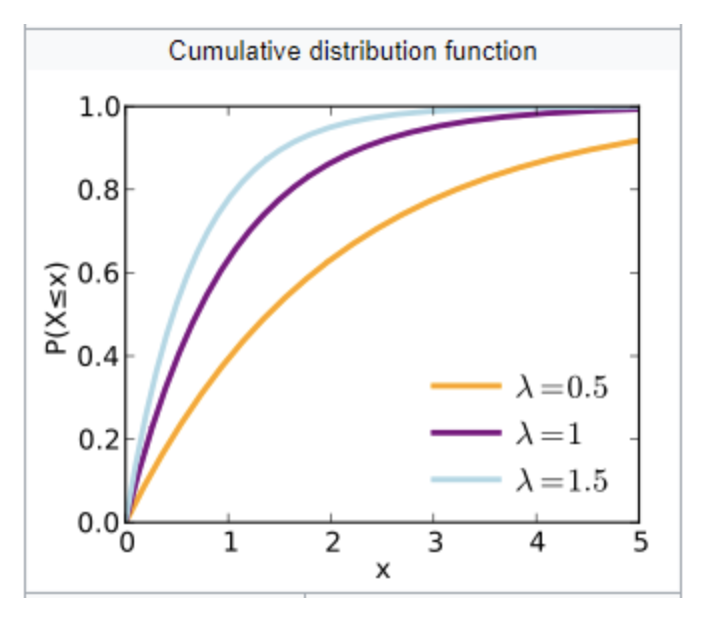

#### Example 1:
Fast forward a year, and New York is the leader in llama-based therapy animals in the subway. Things are going great, however now that they've reached a critical mass, they are chewing on the wires of the trains causing parts to fail. Since the new llama policy has been implemented the average amount of time until a train part fails is 20 minutes. The amount of time until a train part fails follows an exponential distribution.

- What is the probability that a train part will fail within 10 minutes?

In [39]:
import numpy as np
1 - np.exp((-.05*10))

0.3934693402873666

Optional: Look into the Geometric Distribution, which is the analogue of exponential distribution for discrete variables. It can be used to model the probability of failures before success.

____
## Part III. Poisson Distribution


The __Poisson__ distribution is used to model the discrete **count** of the number of occurrences of an event in a given unit of time, distance area or volume. For example, it can be used to answer questions such as:
- How many car accidents happen on a given day?
- Number of customers that shop at a grocery store on a given day
- Number of dandelions per square kilometers

The Poisson distribution applies when: 

1. the event is something that can be counted in whole numbers;  
2. occurrences are independent, so that one occurrence neither diminishes nor increases the chance of another;  
3. the average frequency of occurrence for the time period in question is known;

Bottom line: Poisson applies when the events are __independent and randomly occurring__

- $p(K = k) = \frac{\lambda^k e^{-\lambda}}{k!}$

- The expected value and variance of Poisson is $\lambda$

- where k is the number of occurrences
- and $\lambda$ is a rate (occurrences per a unit of time)
- Note that the expected number of occurrences is also $\lambda$
- $e$ is the base of nature log and = 2.71828

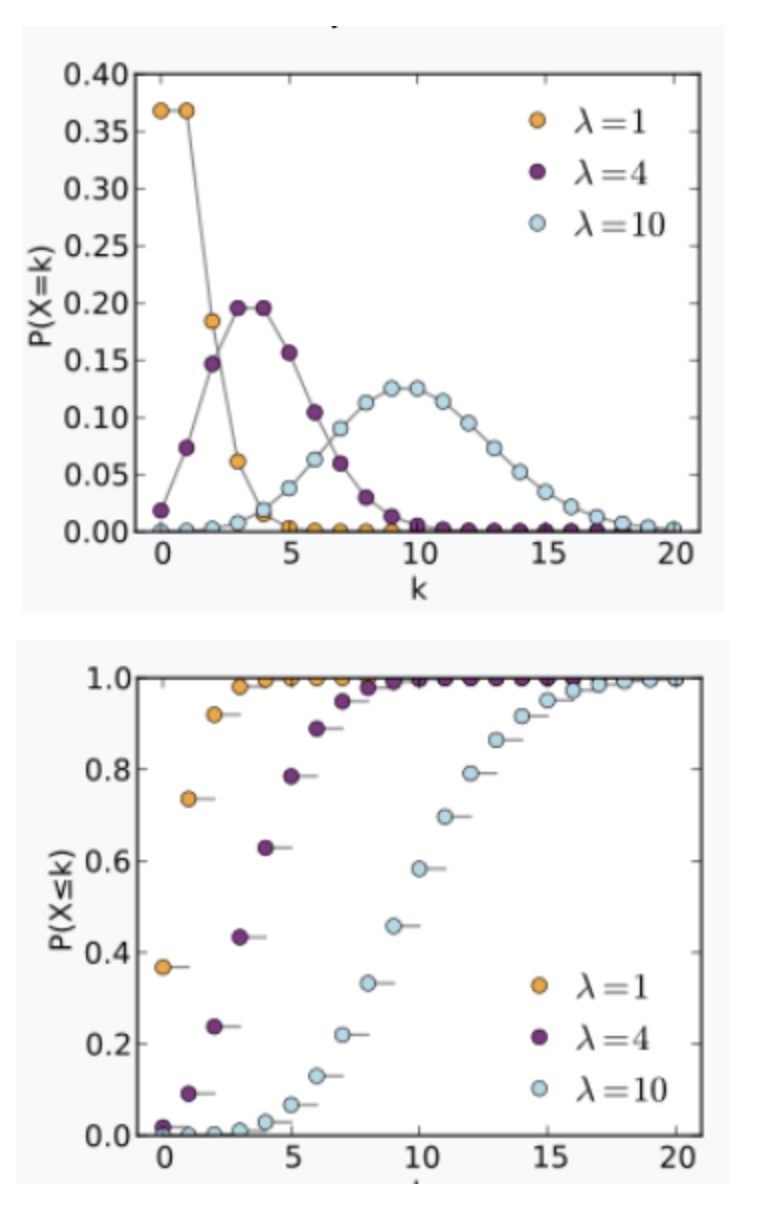

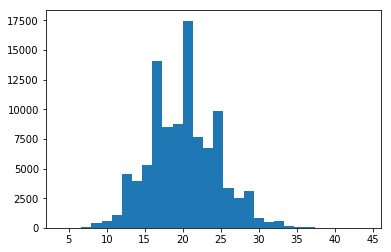

In [8]:
import numpy as np
import matplotlib.pyplot as plt

s = np.random.poisson(20, 100000)
plt.hist(s, 30)

plt.show()

###  Examples

#### Plutonium decay example

* 2.3 decays/second
* So what is the probabiity that in this period there are exactly three decays in two seconds

In [22]:
from scipy.stats import poisson
# k = 3  
# _lambda = 4.6

# 0.1630675806732757
# poisson.pmf(k, lambda)
# poisson.pmf(3, 4.6)
poisson.pmf(3, 4.6)

0.1630675806732757

- What is the probability that no more than three decays in two seconds?

In [40]:
poisson.cdf(3,4.6)

0.3257062830214471

$p(K = k) = \frac{(\lambda t)^k e^{-\lambda t}}{k!}$

#### Traffic accidents on freeway

1. It has been observed that the average number of traffic accidents on the Hollywood Freeway between 7 and 8 AM on Wednesday mornings is 1 per hour. What is the chance that there will be 2 accidents on the Freeway, on some specified Wednesday morning between 7 and 8 am?

2. What is the probability that there are two accidents in 30 minutes?

In [41]:
from math import factorial, exp

def poisson_pmf(_lambda, t, k):
    return (exp(-_lambda*t)*(_lambda*t)**k)/factorial(k)
    

In [42]:
# 2 accidents in 1 hour
# _lambda = 1, t = 1, k = 2
poisson_pmf(1,1,2)

0.18393972058572117

In [43]:
# 2 accidents in 30 min
poisson_pmf(1,0.5,2)

0.07581633246407918

In [44]:
from scipy.stats import poisson
# poisson.pmf(k,lambda)
# 1 - lambda = 1
poisson.pmf(2, 1)

0.18393972058572114

In [45]:
# 2 - lambda = 0.5
poisson.pmf(2,0.5)

0.07581633246407919

##### Poisson or not?
- The average height of students enrolled at Flatiron from January 1st to Febuary 1st
- The number of deaths from horse kicks in the Prussian Army in a year